## Importing Required Modules

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import *
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy.stats import skew
import seaborn as sns
import warnings


warnings.simplefilter(action='ignore', category=FutureWarning)

#

## Loading The Dataset

In [2]:
train_path = 'C:/Users/sxp220047/Downloads/churn/train.csv' 
df_ = pd.read_csv(train_path)

In [3]:
df = df_.copy() # making a copy such that no changes are made to df_

#

## View Dataset

In [4]:
#df.describe
#df.info
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


#

## Checking Null Values

In [5]:
print(df.isna().sum())


AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64


##

## Checking The DataTypes of All Columns

In [6]:
#df.dtypes
#df.info()

column_types = df.dtypes

# Grouping columns by data type and get column names for each group
column_names_by_type = column_types.groupby(column_types).apply(lambda x: x.index.tolist())


for data_type, columns in column_names_by_type.items():
    print(f'Data Type: {data_type}')
    print(f'Columns: {columns}')
    print('\n')


Data Type: int64
Columns: ['AccountAge', 'ContentDownloadsPerMonth', 'SupportTicketsPerMonth', 'WatchlistSize', 'Churn']


Data Type: float64
Columns: ['MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'UserRating']


Data Type: object
Columns: ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID']




# Univariate Analysis

### Descriptive Statistics ( Central Tendency and Min &Max)

In [44]:
descriptive_stats = df.describe()
descriptive_stats

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


#

### Visualizing Summary Statistics of a Numerical Variables

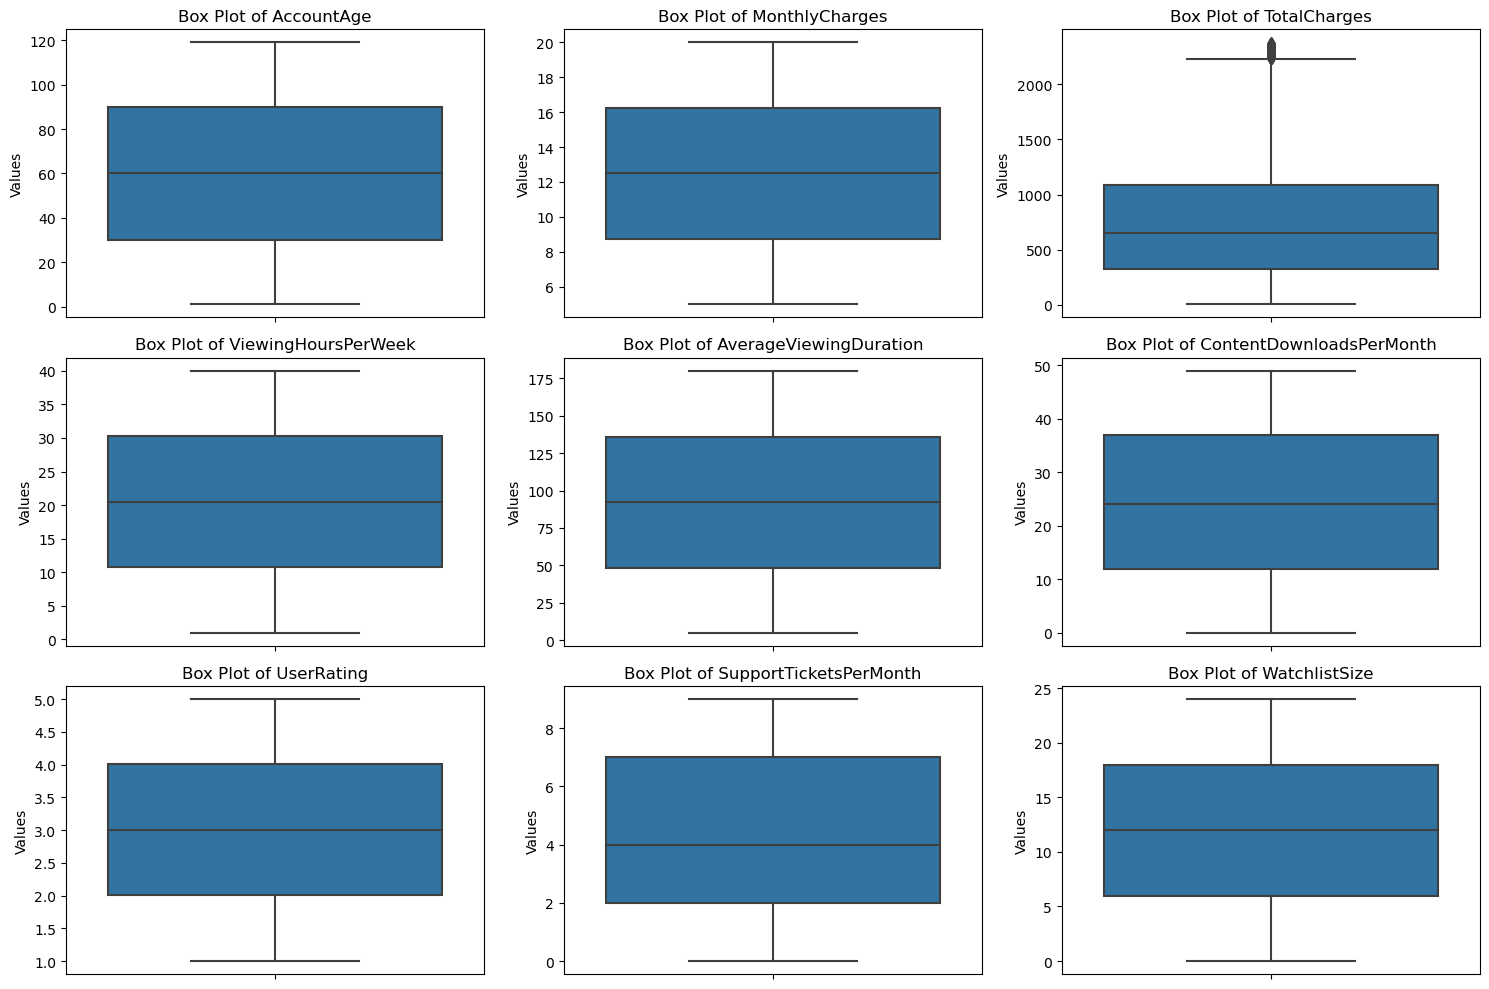

In [8]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col != 'Churn']

# Set the number of rows and columns for the grid
num_rows = 3
num_cols = 3

# Visualization with vertical box plots in a grid format
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))


axes = axes.flatten() # Flatten the axes array for ease of iteration

for i, column_name in enumerate(numerical_columns):
    sns.boxplot(y=df[column_name], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column_name}')
    axes[i].set_ylabel('Values')


plt.tight_layout() # Adjust layout for better spacing
plt.show()


#### Note: further inspection should be performed on 'Total Charges' variable. since it has outliers, outilers should be handled.

#

### Visualizing the distribution of a numerical variable using a kdeplot

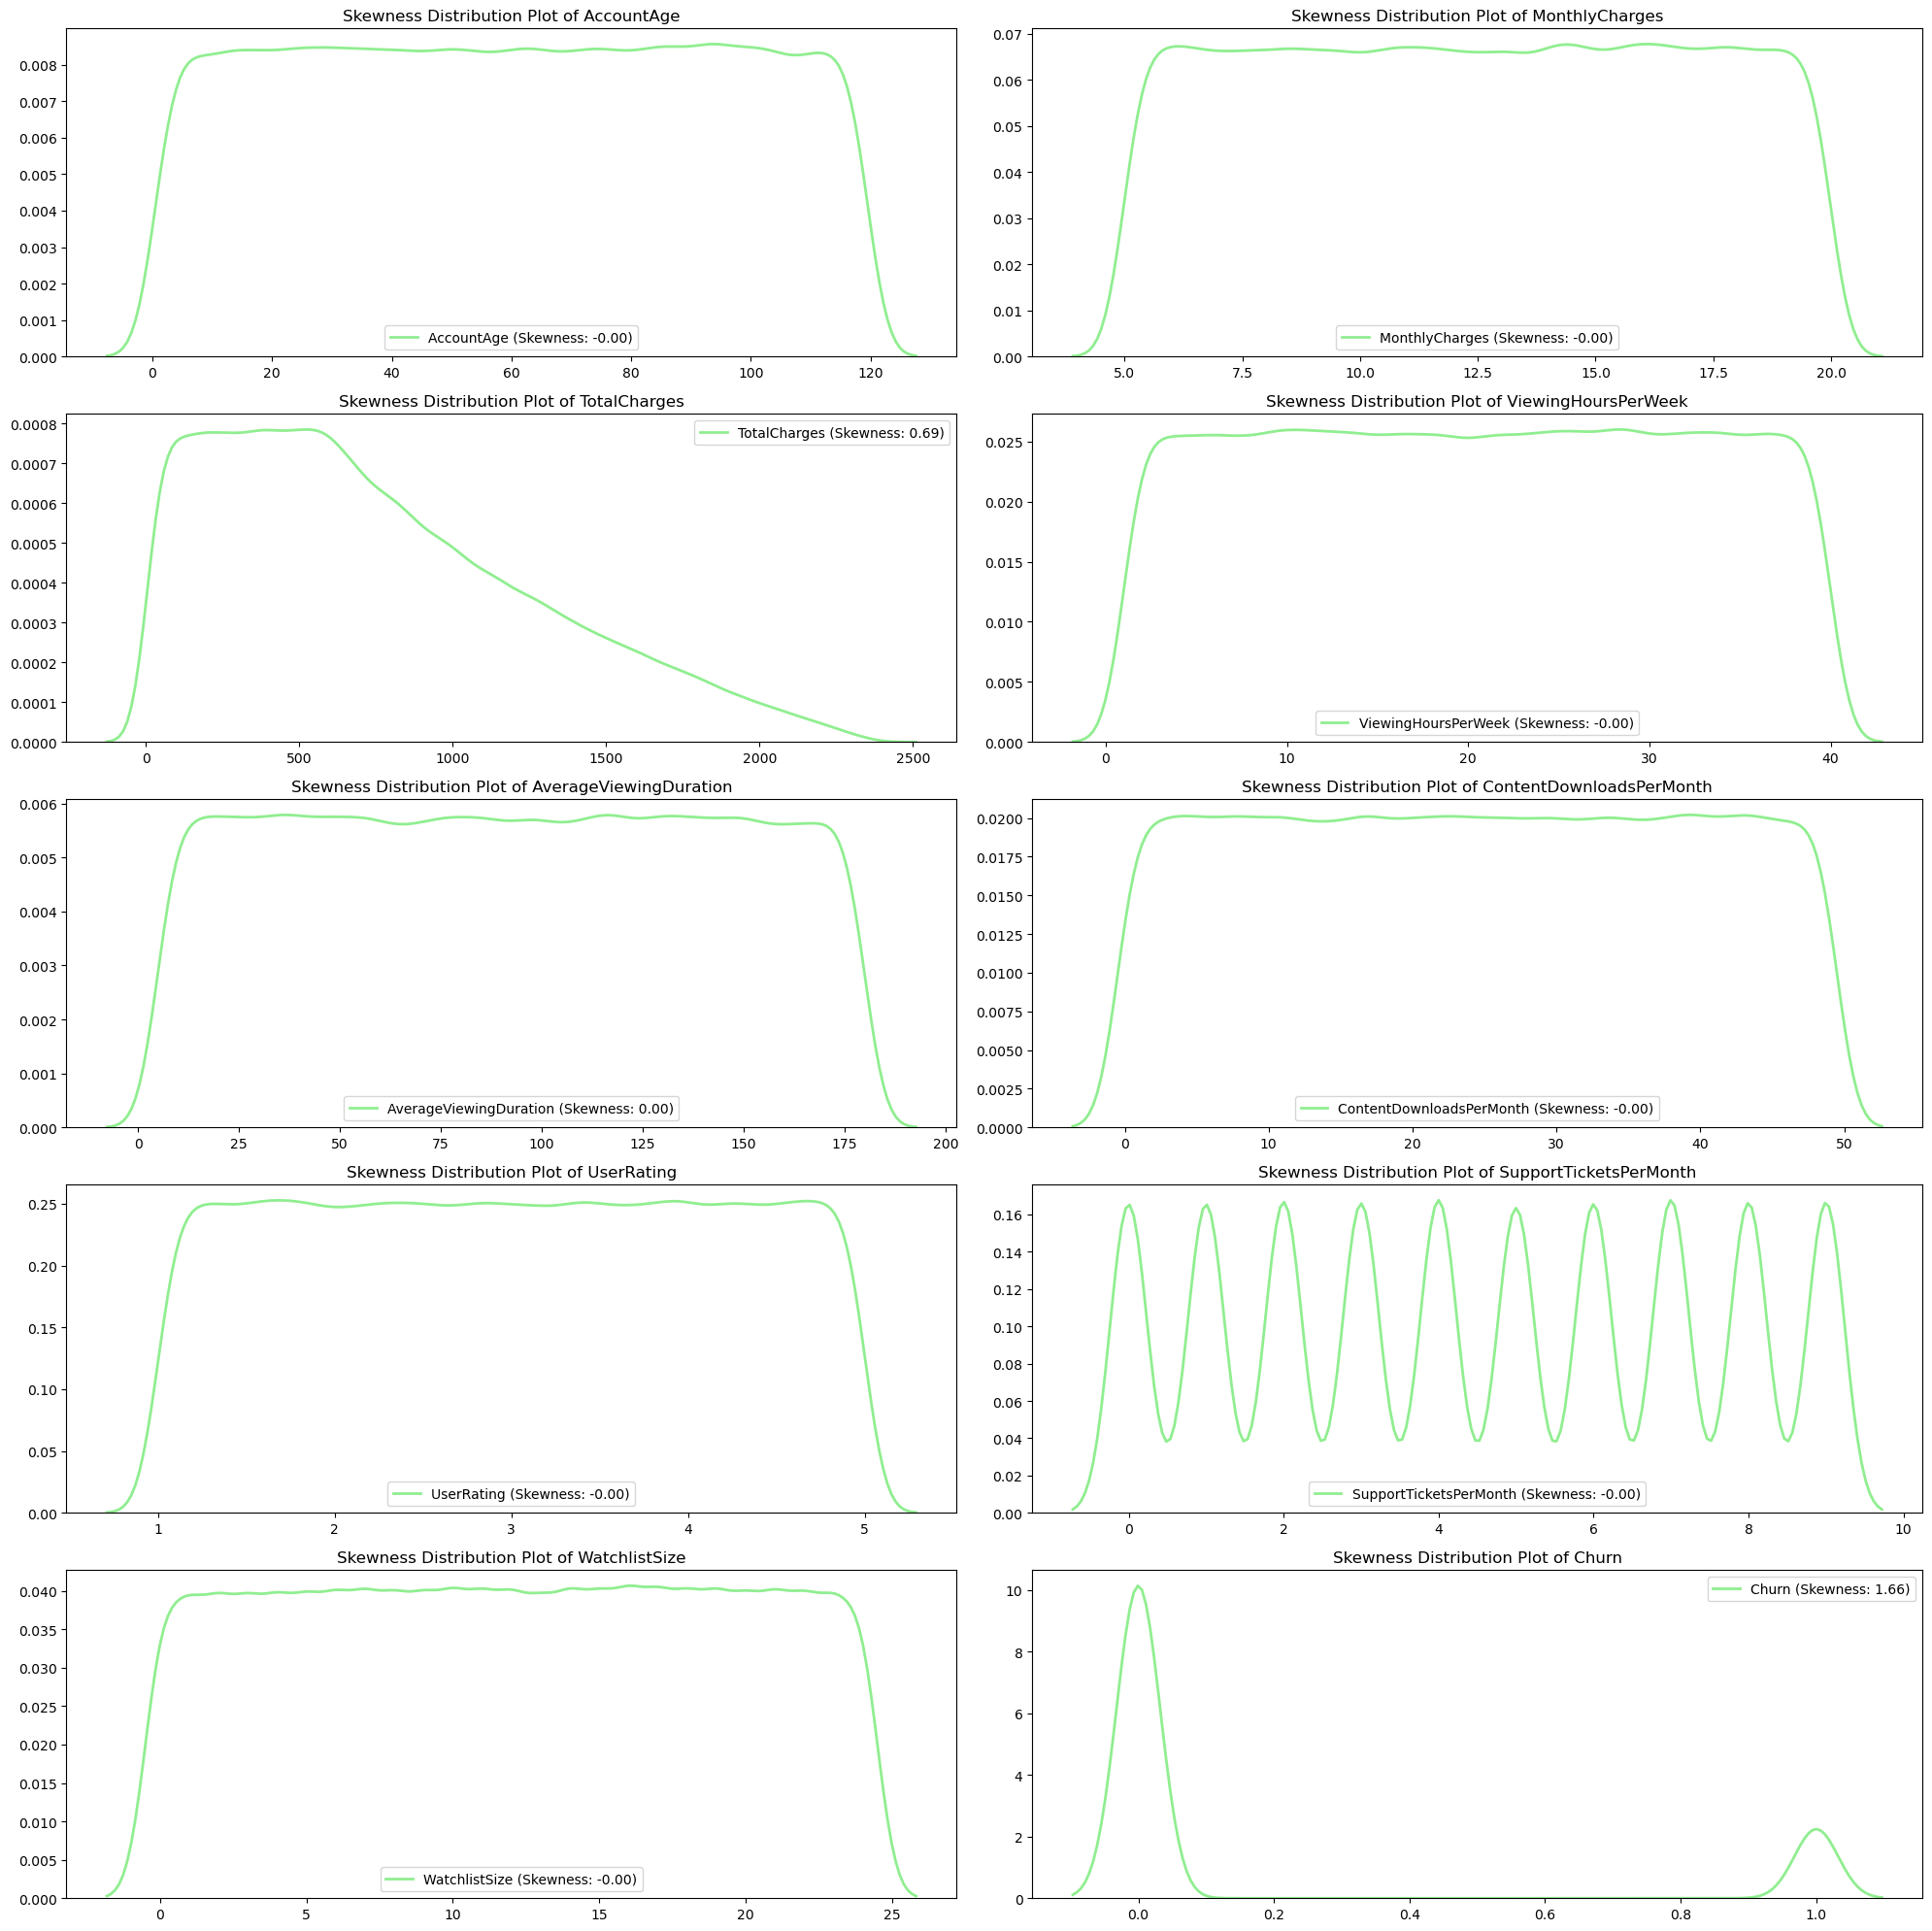

In [47]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the skewness values
skewness = df[numerical_columns].apply(lambda x: skew(x))

# Set the number of rows and columns for the grid
num_rows = 5
num_cols = 2

# Visualization with skewness distribution plots in a grid format
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))


axes = axes.flatten()


for i, column_name in enumerate(numerical_columns):
    sns.kdeplot(df[column_name], color='lightgreen', ax=axes[i], linewidth=2, label=f'{column_name} (Skewness: {skewness[column_name]:.2f})')
    axes[i].set_title(f'Skewness Distribution Plot of {column_name}')
    #axes[i].set_xlabel('Values')
    #axes[i].set_ylabel('Density')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#

### Visualizing Value Counts of Numerical Variables

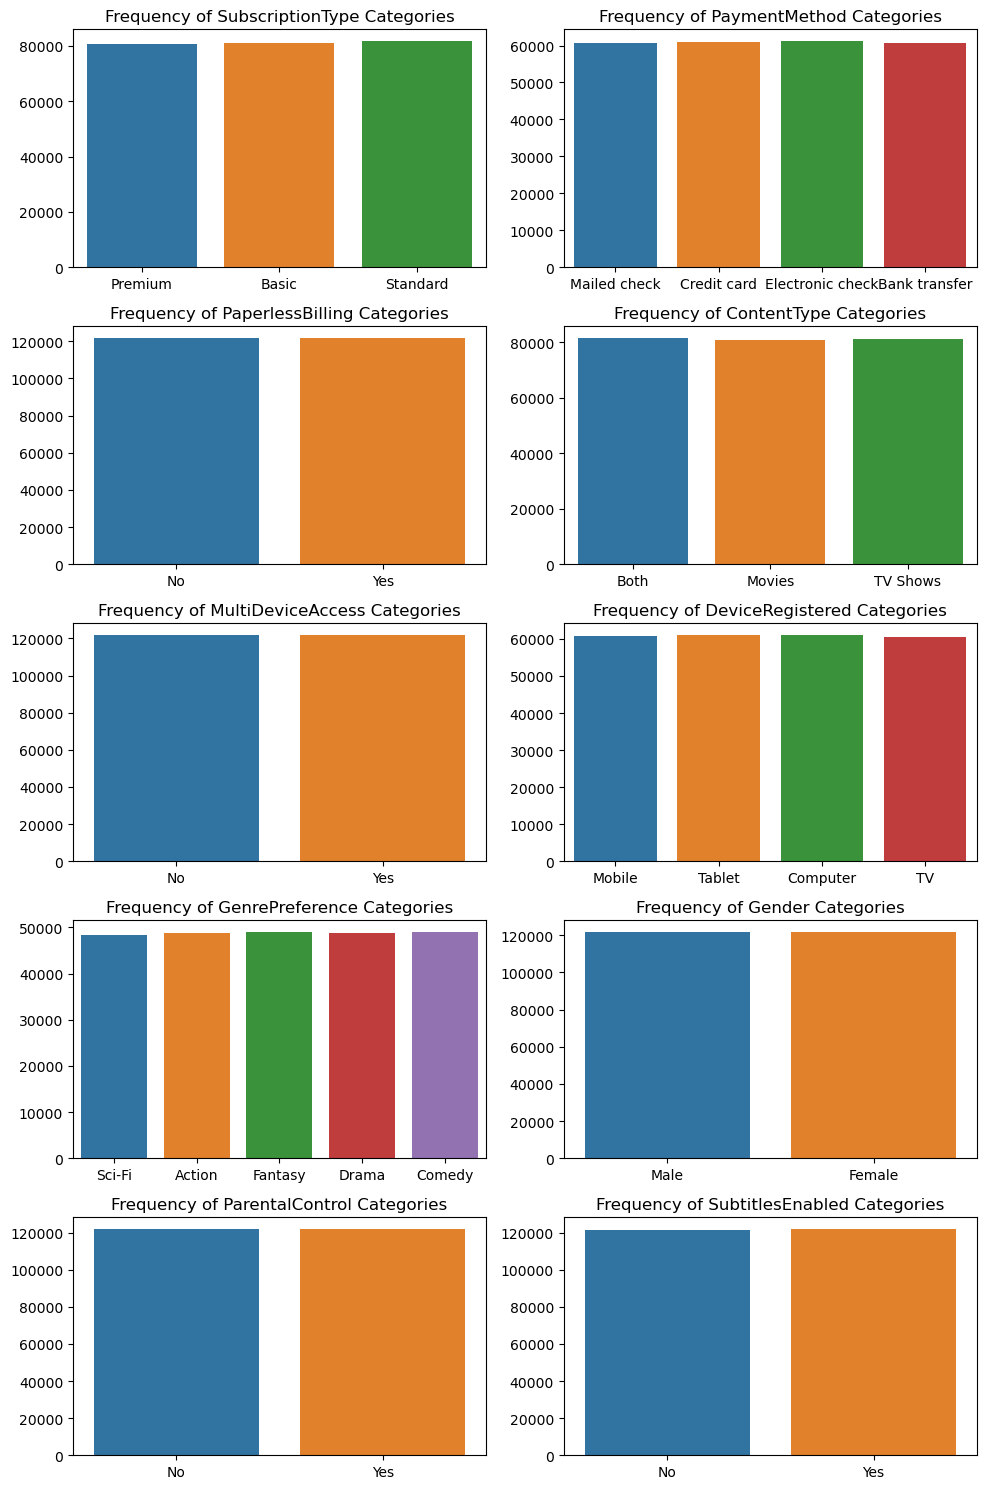

In [46]:

categorical_columns = df.select_dtypes(include='object').columns

categorical_columns = [col for col in categorical_columns if col != 'CustomerID']

num_rows = 5
num_cols = 2

# Visualization with count plots in a grid format
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))


axes = axes.flatten()

# Iterate over categorical columns and create count plots
for i, column_name in enumerate(categorical_columns):
    sns.countplot(x=df[column_name], ax=axes[i])
    axes[i].set_title(f'Frequency of {column_name} Categories')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


plt.tight_layout()
plt.show()



### Visualizing Value Counts of Categorical Variables

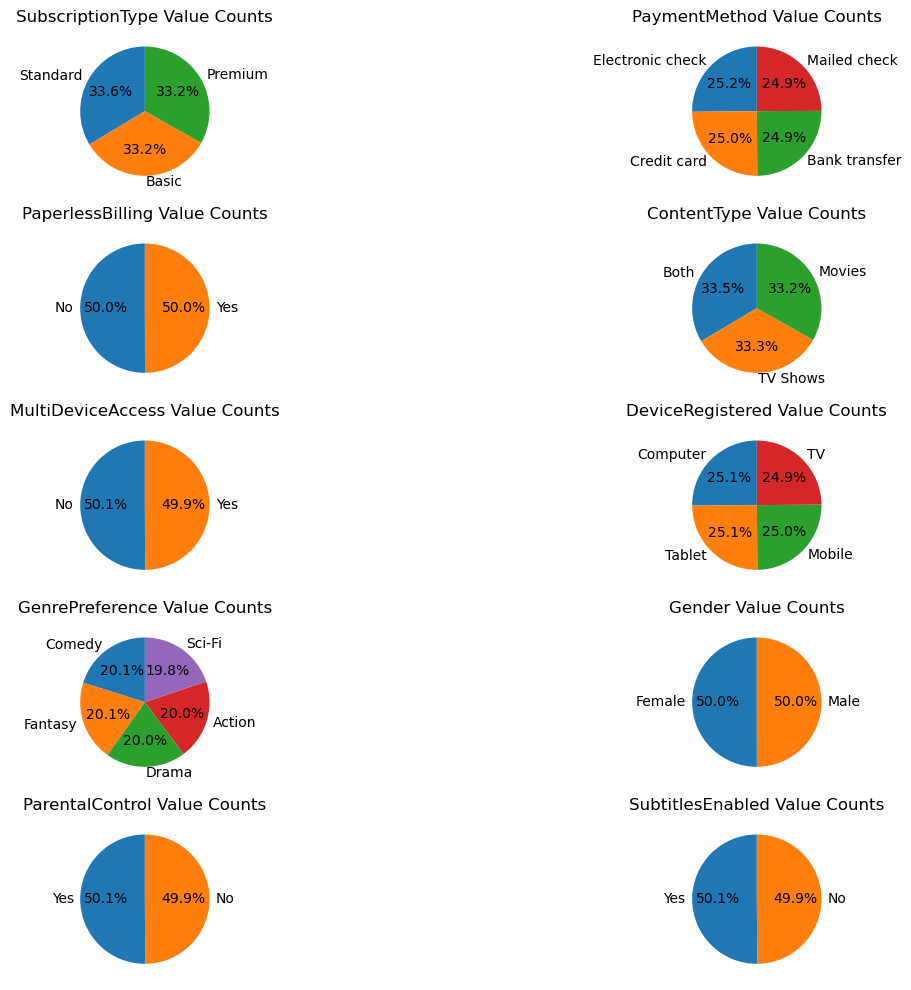

In [11]:
def plot_pie_charts(df, categorical_columns):
    
    num_rows = 5
    num_cols = 2

    # Visualization with pie charts in a grid format
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    
    axes = axes.flatten()

    # Iterate over categorical columns and create pie charts
    for i, column_name in enumerate(categorical_columns):
        # Get value counts
        value_counts = df[column_name].value_counts()

        # Plot pie chart
        axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'{column_name} Value Counts')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame and categorical columns
plot_pie_charts(df, categorical_columns)


#

# Multivariate Analysis

### Visualizing Numerical Columns by Churn Rate

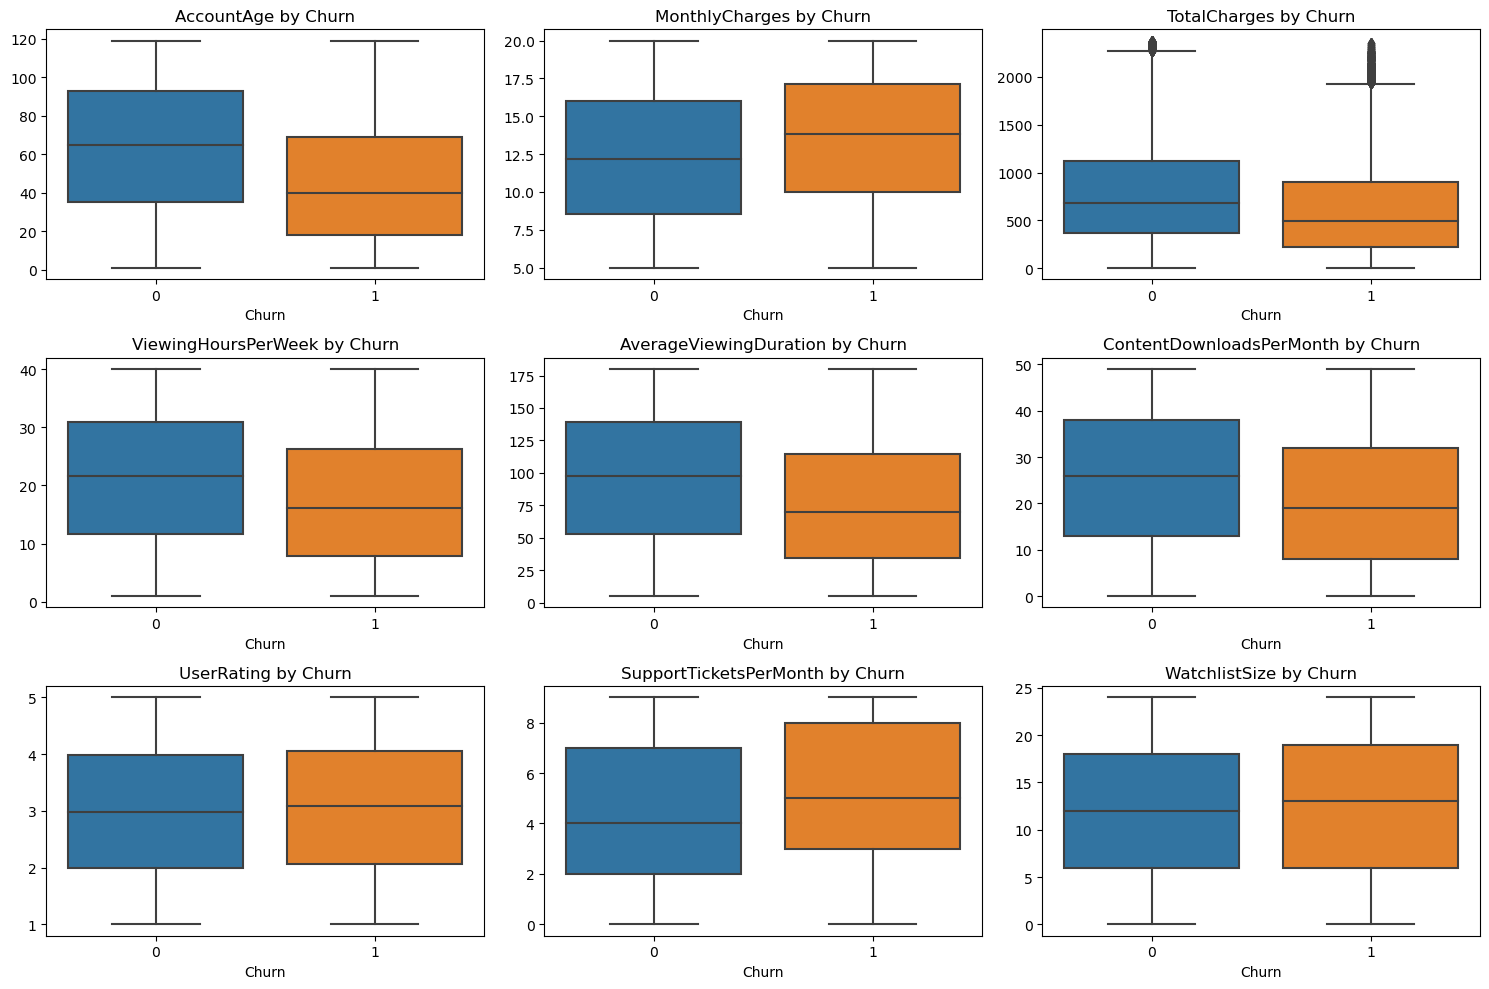

In [12]:

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col != 'Churn']

# Set the number of rows and columns for the grid
num_rows = 3
num_cols = 3

# Create a 3x3 grid of box plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for ease of iteration
axes = axes.flatten()

# Iterate over numerical columns and create box plots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x='Churn', y=column, data=df, ax=axes[i])
    #sns.boxplot(x='Churn', y=column, data=df, ax=axes[i],hue='Churn')
    axes[i].set_title(f'{column} by Churn')
    axes[i].set_ylabel('')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Visualizing Categorical Columns by Churn Rate

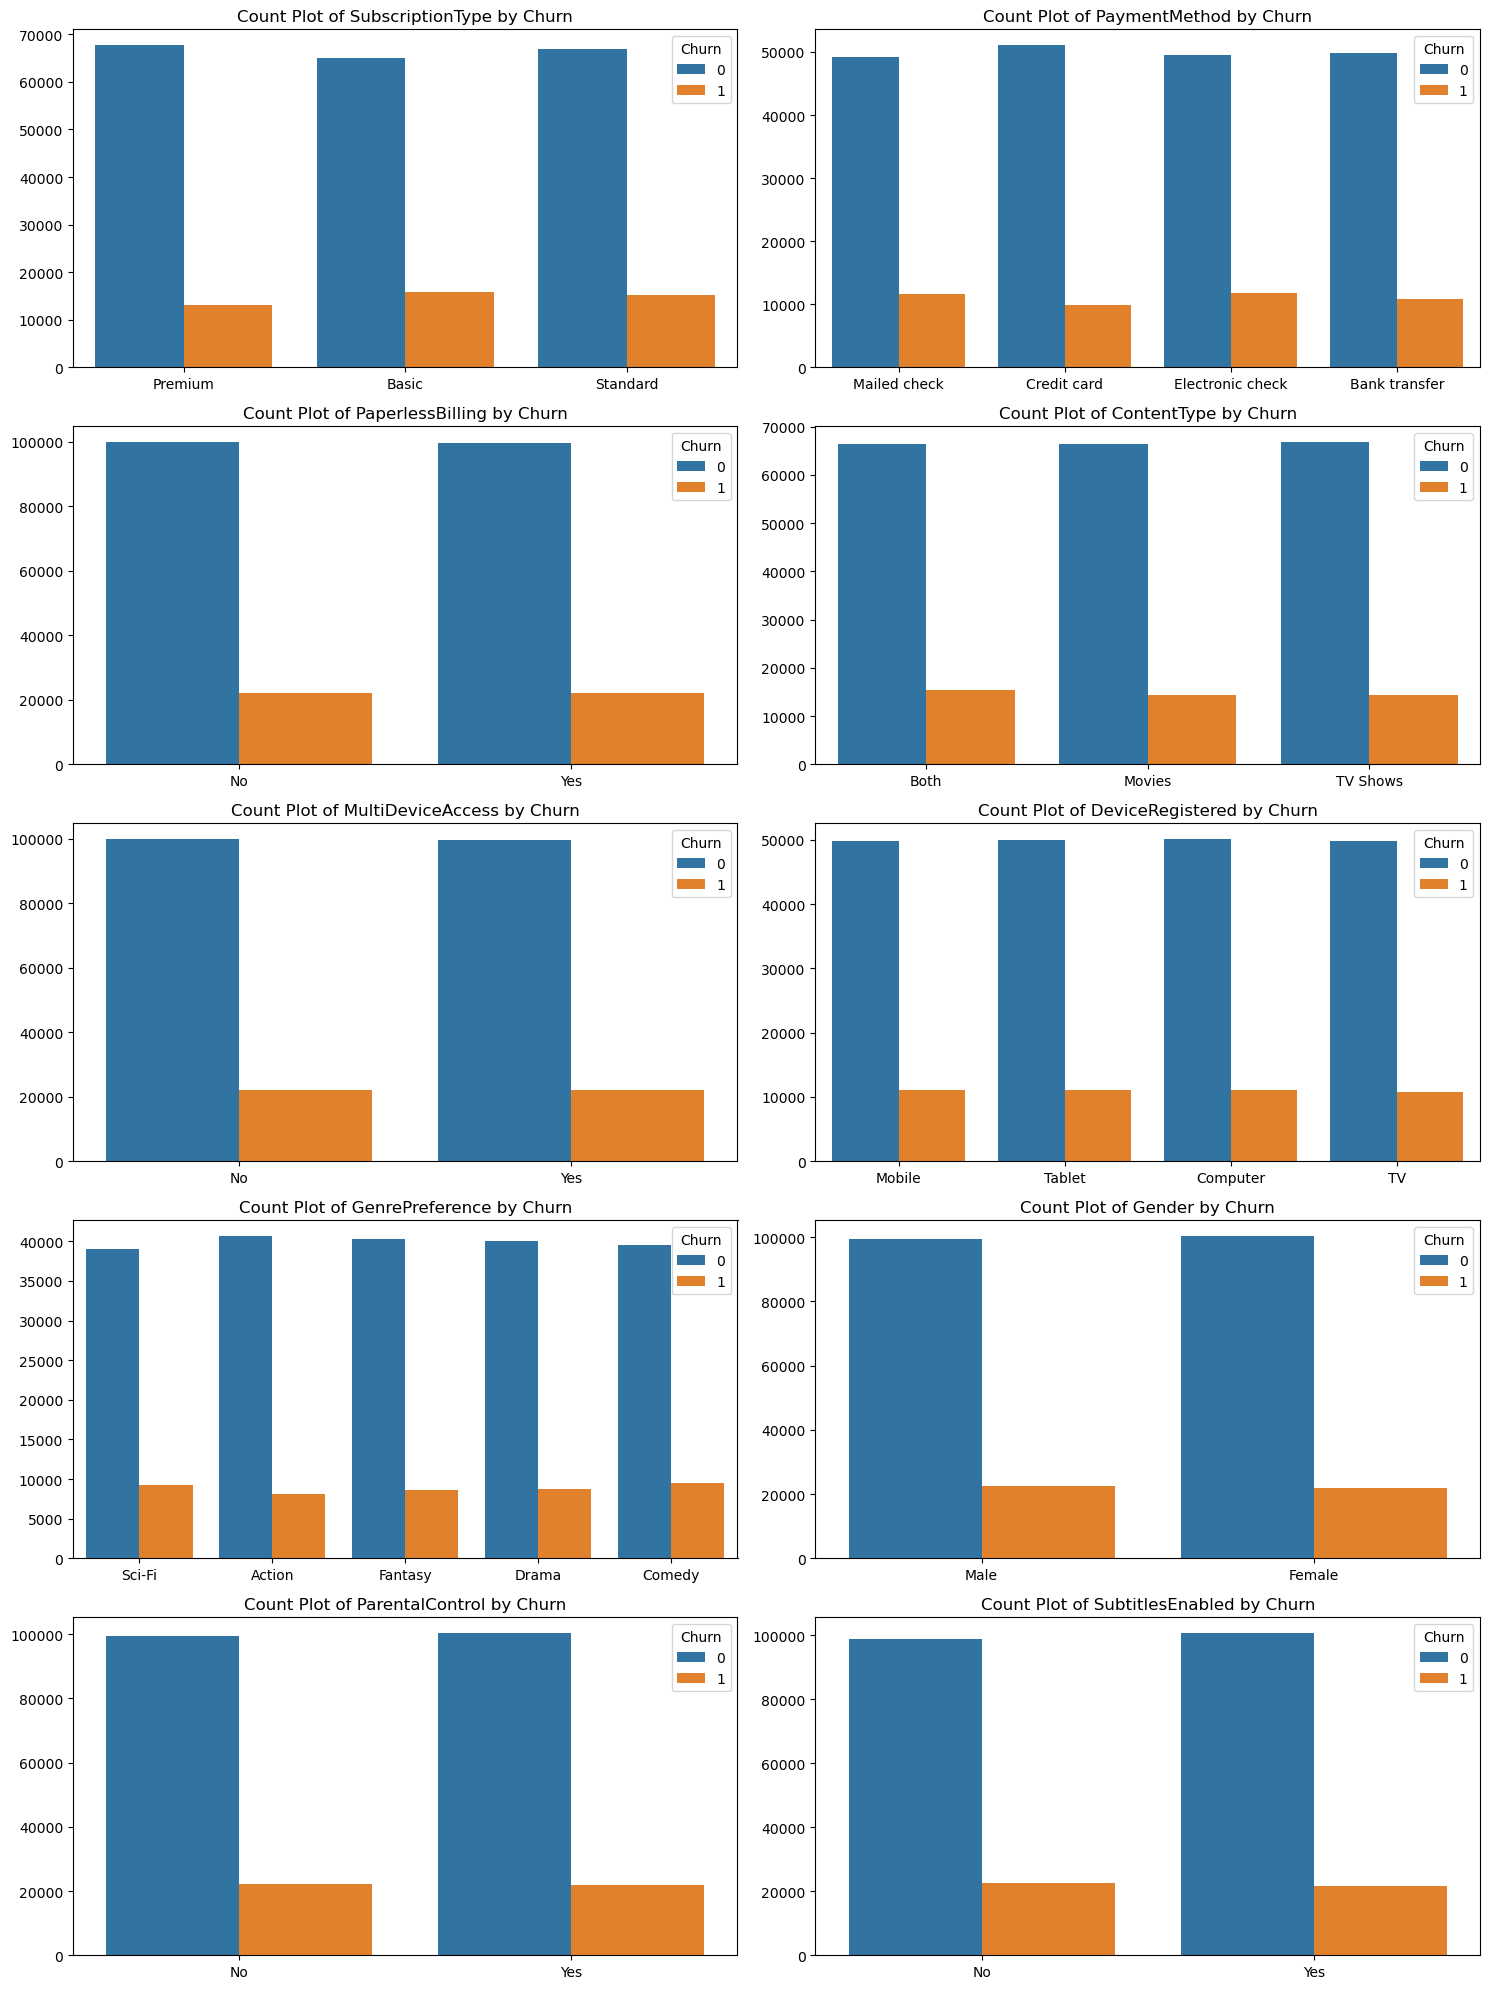

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != 'CustomerID']

# Set the number of rows and columns for the grid
num_rows = 5
num_cols = 2

# Create a 5x2 grid of count plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array for ease of iteration
axes = axes.flatten()

# Iterate over categorical columns and create count plots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column} by Churn')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()


###

### Heatmap to Check Correlation Between Variables

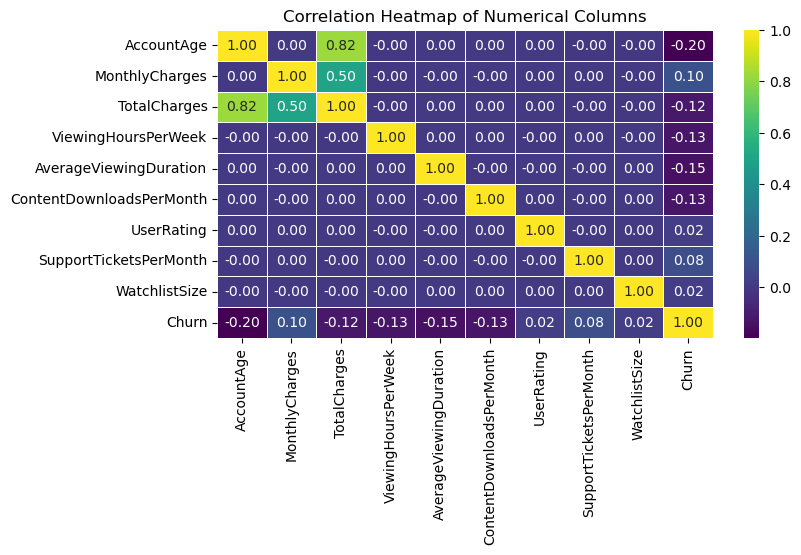

In [20]:

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 4))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Numerical Columns')

# Show the plot
plt.show()


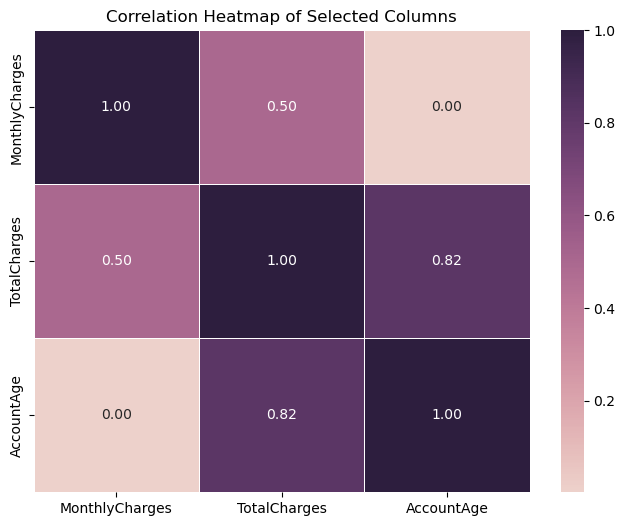

In [36]:

var = ['MonthlyCharges', 'TotalCharges', 'AccountAge']

# Create a subset of the dataframe with the selected columns
var_df = df[var]

# Calculate the correlation matrix
correlation_matrix = var_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Selected Columns')

# Show the plot
plt.show()

In [43]:
#var = ['MonthlyCharges', 'TotalCharges', 'AccountAge']
#df[var].head(10)
#print(correlation_matrix)


correlation_coefficient = df['AccountAge'].corr(df['TotalCharges'])

print(f'Correlation coefficient between AccountAge and TotalCharges: {correlation_coefficient}')


Correlation coefficient between MonthlyCharges and TotalCharges: 0.8201439808903792


##### Note: It is evident that there is high correlation between TotalCharges & AccountAge